# Brainstorm

## Exploration
1. Value counts by variable + plots

## Potential Target Variables
1. age: float
2. orientation: {0 = straight, 1 = gay/bisexual}
3. sex_cleaned: {0 = male, 1 = female}
4. body_type_cleaned: {average, fit, athletic, thin, curvy, a little extra, skinny, full figured}
5. diet_cleaned: {anything, vegetarian, other, vegan}
6. drugs_cleaned: {0 = no, 1 = yes}
7. education: {undergraduate, graduate, high school, other}
8. ethnicity: {white, asian, hispanic, black}
9. job_cleaned: {student, science, computer, artistic, sales, medicine, education, executive, banking, entertainment, law, hospitality, construction}
10. location_cleaned: {1 = from San Francisco, 0 = otherwise}
11. offspring_cleaned: {0 = no kids, 1 = has kids}
12. pets_cleaned: {0 = no pets, 1 = has pets}
13. religion_cleaned
14. sign_cleaned
15. sign_importance_cleaned: {0 = doesn't matter, 1 = fun to think about}
16. smokes_cleaned: {0 = no, 1 = yes}
17. multilingual: {0 = no, 1 = yes}
18. drinks_cleaned: {0 = no, 1 = yes}

## Feature Engineering
#### Text
1. tfidf vs. counts
2. Punctuation vs. remove punctuation
3. Stemming vs. no stemming
4. Unigram vs. bigram (vs. interpolation between the two)
5. Different dictionary sizes
6. Combining all essays vs. leaving them separate

## Models
1. Multi-class logistic
2. Neural Net

## Relevant Papers
1. https://www.researchgate.net/publication/282009623_OkCupid_Data_for_Introductory_Statistics_and_Data_Science_Courses


# Setup & Import Dataset

In [ ]:
import csv
import string
import numpy as np
import pandas as pd
from sklearn import linear_model
import xgboost
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import figure
import random
import seaborn as sns
# import shap
from collections import defaultdict
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Eiffel, Anshuman
path_to_data = '/content/drive/MyDrive/Colab Notebooks/okcupid_profiles.csv'

In [ ]:
# Read in data
df = pd.read_csv(path_to_data)
#df = pd.read_csv('/content/drive/MyDrive/profiles.csv')


# Randomize entries
df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)

# Task 1: Describe Dataset

## General

In [ ]:
df.iloc[3:]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
3,36,single,m,straight,a little extra,NaN,socially,never,graduated from two-year college,white,65.0,100000,medicine / health,2012-06-29-09-10,"san francisco, california",NaN,likes dogs and has cats,NaN,sagittarius and it&rsquo;s fun to think about,yes,english,"ok first thing all my pics are me and my dog, ...",trying to build my empire. lol.,staying positive and keeping things light. eve...,meet me and find out,"i am not much of a reader, i love movies and f...",i recently lost my dog which was the top of th...,"how to make my life better, what goals i shoul...","i hate to say it but work, i do work some horr...","i don't really believe in secrets or lies, so ...",you are looking for a teammate. you are respon...
4,30,single,m,gay,fit,strictly anything,rarely,NaN,working on college/university,other,72.0,-1,other,2012-06-27-22-36,"san francisco, california",NaN,NaN,other and laughing about it,gemini and it&rsquo;s fun to think about,no,english,"practically imperfect in every way. casual, co...","very close to graduating, odd jobs in the mean...",observing the storybook. remembering the paral...,i have various prize-winning body parts. yeste...,i read a lot and usually carry around 1 fictio...,"i've got everything i need, but it's always ni...",why? why? why? and how come?,watching the detectives (they're so cute).,ask me anything.,you can have fun doing nothing much at all. yo...
5,29,married,m,bisexual,average,mostly vegetarian,socially,sometimes,graduated from college/university,white,72.0,-1,science / tech / engineering,2012-05-11-16-38,"san francisco, california",doesn't have kids,NaN,NaN,NaN,no,english,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,25,single,m,straight,athletic,NaN,rarely,never,working on college/university,white,74.0,50000,other,2012-06-30-11-20,"san francisco, california",doesn't have kids,likes dogs and likes cats,judaism and laughing about it,NaN,no,english,i am that nice young jewish man that your mom ...,running my personal training and martial arts ...,being a ginga ninja.,"people usually notice my red hair, height, phy...",just started reading the game of thrones serie...,family friends laughing,"life, politics, goals and worrying about worry...",working at my bar or out with friends.,first off let me tell you i was really young w...,you're bored. you actually read all of this. y...
7,27,single,f,straight,thin,strictly other,often,NaN,working on masters program,white,63.0,-1,artistic / musical / writer,2012-03-31-03-49,"san francisco, california",NaN,likes dogs,agnosticism and laughing about it,leo and it&rsquo;s fun to think about,no,"english, spanish (okay)","i am...a cleveland native, lived in marietta (...",enjoying it...trying to accomplish just a few ...,"painting, smiling, and accepting people for wh...","not too sure....smile, laugh, eyes...the usual...","books: skinny legs and all, popco, stranger in...",1. friends 2. painting 3. stargate 4. learning...,"the progression of time, the process of learni...","in ohio, i'd be chillin with my lovelies smart...",i'm better at written communication than verba...,"you're laid-back, non-controlling, can shrug o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,40,single,m,straight,average,mostly anything,often,NaN,graduated from masters program,black,74.0,100000,executive / management,2012-06-30-12-50,"san francisco, california",NaN,NaN,NaN,capricorn but it doesn&rsquo;t matter,no,"english (fluently), spanish (poorly)",coming very very soon...,NaN,NaN,NaN,NaN,NaN,NaN,either wreaking havoc on some poor restaurant ...,NaN,NaN
59942,36,single,m,straight,average,NaN,socially,never,two-year college,NaN,69.0,-1,science / tech / engineering,2012-06-30

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [ ]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [ ]:
df.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

In [ ]:
df['height'] = df['height'].fillna(np.mean(df['height']))
df = df.fillna('NA')

## Age

In [ ]:
df['age'].describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

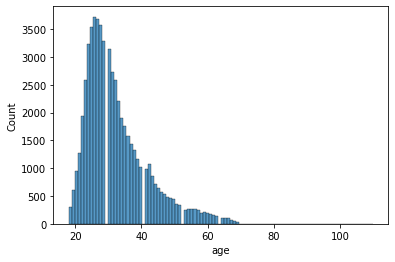

In [ ]:
sns.histplot(x='age', data=df, bins=100)

In [ ]:
max(df['age'])

110

In [ ]:
df[df['age'] > 80]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
21424,110,single,f,straight,NA,NA,NA,NA,NA,NA,67.0,-1,NA,2012-06-27-22-16,"daly city, california",NA,NA,NA,NA,NA,english,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
26912,109,available,m,straight,athletic,mostly other,NA,never,working on masters program,NA,95.0,-1,student,2012-06-30-18-18,"san francisco, california",might want kids,NA,other and somewhat serious about it,aquarius but it doesn&rsquo;t matter,when drinking,english (okay),NA,NA,NA,nothing,NA,NA,NA,NA,NA,NA


In [ ]:
df[df['age'] < 18]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9


## Status

In [ ]:
df['status'].value_counts()

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64

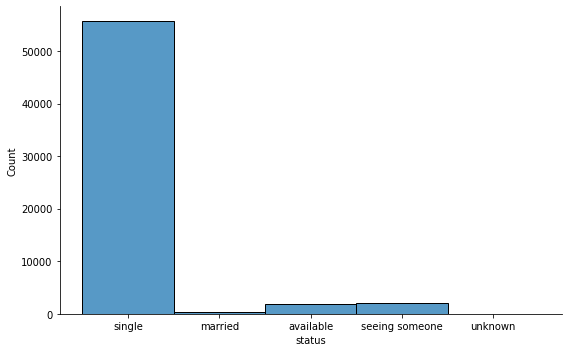

In [ ]:
sns.displot(x='status', data=df, height=5, aspect=8/5)

In [ ]:
df['essay0'].iloc[1139]

'looking for someone fun to hang out with while enjoying what life has to offer. children, seniors and my new cat, j. c. snookem keep me aligned with their love. i enjoy writing and most creative activities. my latest passion is plant propagation; do you know of a plant i must have for my collection?'

## Sex 

In [ ]:
df['sex'].value_counts()

m    35829
f    24117
Name: sex, dtype: int64

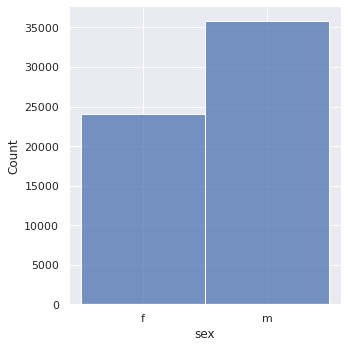

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.displot(x='sex', data=df)

In [ ]:
df['sex_cleaned'] = [1 if d == 'f' else 0 for d in df['sex']]

In [ ]:
df['sex_cleaned'].value_counts()

0    35829
1    24117
Name: sex_cleaned, dtype: int64

## Orientation

In [ ]:
df['orientation'].value_counts()

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

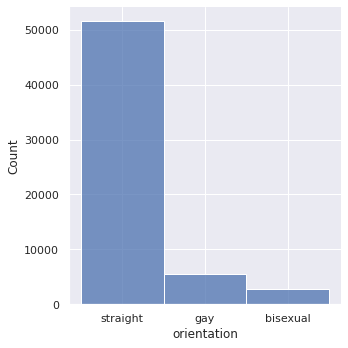

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.displot(x='orientation', data=df)

In [ ]:
df['orientation_cleaned'] = [0 if d == 'straight' else 1 for d in df['orientation']]

In [ ]:
df['orientation_cleaned'].value_counts()

0    51606
1     8340
Name: orientation_cleaned, dtype: int64

## Body Type

In [ ]:
df['body_type'].value_counts()

average           14652
fit               12711
athletic          11819
NA                 5296
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

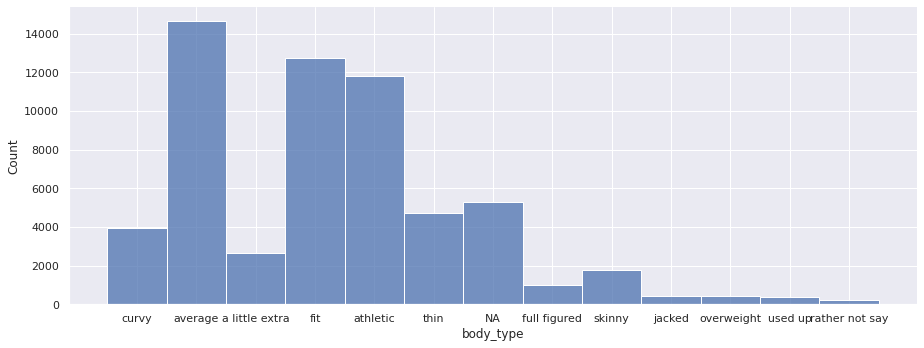

In [ ]:
sns.displot(x=df['body_type'], height=5, aspect=13/5)

In [ ]:
df['body_type_cleaned'] = df['body_type'].map({
    'average':'average',
    'fit':'fit',
    'athletic':'athletic',
    'thin':'thin',
    'curvy':'curvy',
    'a little extra':'a little extra',
    'skinny':'skinny',
    'full figured':'full figured'
}).fillna('NA')

In [ ]:
df['body_type_cleaned'].value_counts()

average           14652
fit               12711
athletic          11819
NA                 6714
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
Name: body_type_cleaned, dtype: int64

## Diet

In [ ]:
df['diet'].value_counts()

NA                     24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

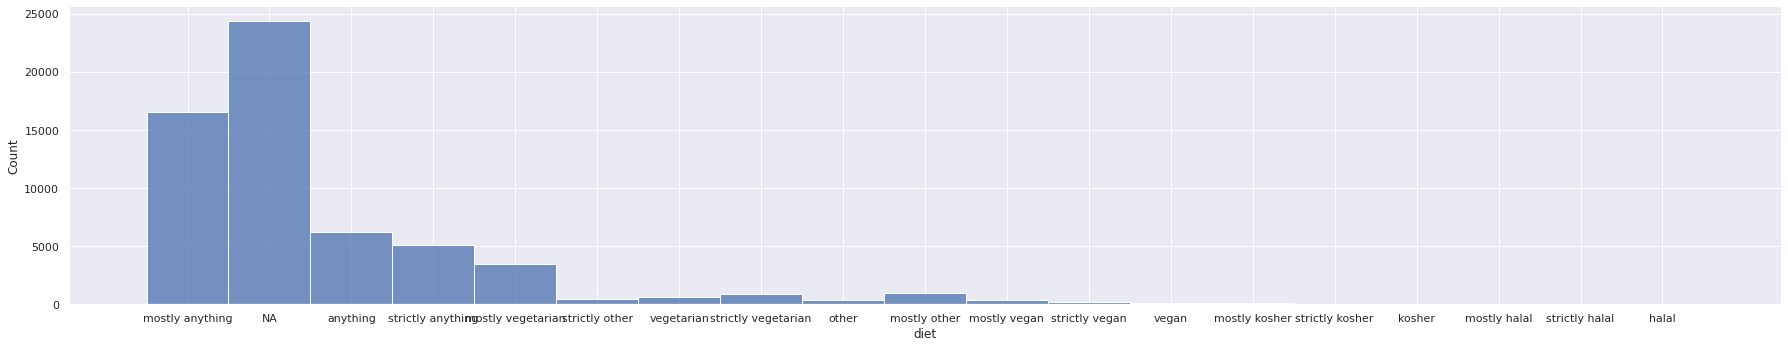

In [ ]:
sns.displot(x=df['diet'], height=5, aspect=25/5)

In [ ]:
df['diet_categories'] = [d.split()[1] if (len(d.split()) > 1) else d for d in df['diet']]

In [ ]:
df['diet_categories'].value_counts()

anything      27881
NA            24395
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet_categories, dtype: int64

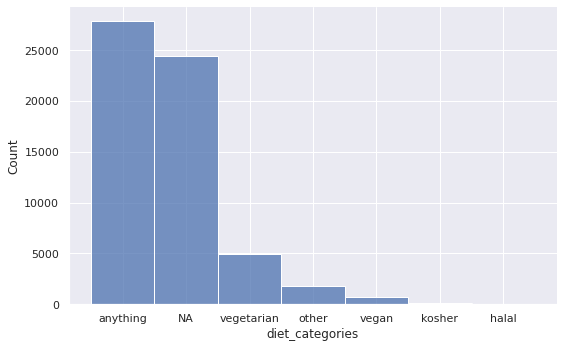

In [ ]:
sns.displot(x=df['diet_categories'], height=5, aspect=8/5)

In [ ]:
df['diet_cleaned'] = df['diet_categories'].map({
    'anything':'anything',
    'vegetarian':'vegetarian',
    'vegan':'vegan',
    'NA':'NA'
}).fillna('other')

In [ ]:
df['diet_cleaned'].value_counts()

anything      27881
NA            24395
vegetarian     4986
other          1982
vegan           702
Name: diet_cleaned, dtype: int64

## Drinks

In [ ]:
df['drinks'].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
NA              2985
very often       471
desperately      322
Name: drinks, dtype: int64

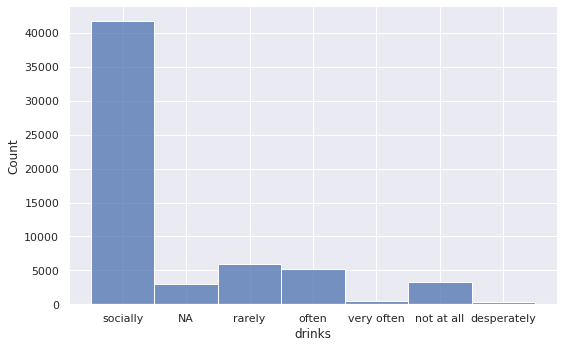

In [ ]:
sns.displot(x=df['drinks'], aspect=8/5)

In [ ]:
df[df['drinks'] == 'desperately']

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned
225,21,single,f,straight,curvy,strictly other,desperately,often,dropped out of high school,black,74.0,-1,unemployed,2012-06-30-01-01,"berkeley, california","doesn't have kids, and doesn't want any",dislikes dogs and dislikes cats,islam and very serious about it,pisces and it matters a lot,yes,"english (fluently), english (fluently), englis...",NA,NA,everything,NA,NA,NA,NA,NA,NA,NA,1,0,curvy,other,other
883,26,single,f,straight,thin,mostly vegetarian,desperately,never,graduated from masters program,white,62.0,-1,NA,2012-06-26-12-50,"san francisco, california",NA,likes dogs and likes cats,other and very serious about it,NA,no,english,i am obsessively passionate about endangered a...,i have the insane good fortune to be doing the...,"late night, half-drunk talks on the scientific...",my pixie-like smallness. around an hour later ...,right now i'm reading fierce invalids home fro...,"tigers trees the classic ffl friends, family,...",this really sweet monastery in thailand where ...,it used to be drinking/dinner with friends. bu...,"eh, i love dungeons and dragons. may as well c...",you are interesting and not a serial killer! i...,1,0,thin,vegetarian,vegetarian
1290,20,single,m,straight,thin,strictly kosher,desperately,sometimes,graduated from college/university,white,65.0,80000,science / tech / engineering,2012-06-30-22-46,"richmond, california",NA,likes dogs and likes cats,judaism and laughing about it,cancer but it doesn&rsquo;t matter,trying to quit,"english (fluently), chinese (okay)",i grew up in mianus. its cool. but enough abou...,i studied turtles at connecticut tech. right n...,playing the recorder. answering questions abou...,i look like a rat and i jump on bandwagons whe...,"twilight series. the novel ""powerful women"". i...",my friends and family back in mianus. long wal...,swimming with turtles. ryan seacrest. why hotd...,talking on facebook about things nobody cares ...,i wear a bathing suit when i take a shower.,"if you want to hear about mianus, why people c...",0,0,thin,kosher,other
1323,41,single,m,straight,average,NA,desperately,sometimes,dropped out of space camp,NA,69.0,-1,rather not say,2012-03-07-12-45,"san francisco, california",NA,likes cats,NA,libra,no,english,i am soaking in a claw-foot tub filled with me...,my life? not much. mostly soaking in a tub of ...,using telekinesis to heat solids to liquids.,"the chocolate behind my ears. that, and my sof...","i like big ,heavy books and small paperbacks, ...","vowels, even numbers, am radio, chocolate, sil...",sex. and whales.,"soaking in a tub of hot soothing chocolate, li...",i've always fantasized about making love on th...,you want to go get a snack or something. i'm g...,0,0,average,NA,NA
1324,18,single,f,bisexual,used up,strictly vegan,desperately,often,dropped out of space camp,"middle eastern, white",61.0,-1,artistic / musical / writer,2012-06-30-23-56,"portland, oregon",NA,NA,NA,NA,no,"english (poorly), french (poorly)",the pinnacle of good looks,drama school,"sex, roller derby, drag",food in my moustache,NA,NA,"her long hair, still wet from the shower, had ...",masturbating furiously,this is a rough draft,"affluent, british citizen",1,1,NA,vegan,vegan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,35,single,m,straight,a little extra,strictly anything,desperately,NA,graduated from college/university,white,76.0,-1,hospitality / travel,2012-06-30-14-36,"san francisco, california","doesn't have kids, and doesn't want any",has dogs and likes cats,atheism and laughing about it,sagittarius but it doesn&rsquo;t matter,when drinking,"english (poorly),

In [ ]:
df['drinks_cleaned'] = df['drinks'].map({
    'not at all': 0,
    'rarely': 0, 
    'NA': 'NA'
}).fillna(1)

In [ ]:
df['drinks_cleaned'].value_counts()

1     47737
0      9224
NA     2985
Name: drinks_cleaned, dtype: int64

## Drugs

In [ ]:
df['drugs'].value_counts()

never        37724
NA           14080
sometimes     7732
often          410
Name: drugs, dtype: int64

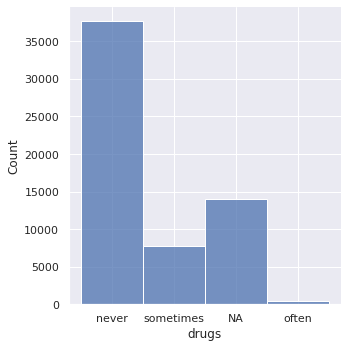

In [ ]:
sns.displot(x=df['drugs'], height=5, aspect=5/5)

In [ ]:
df['drugs_cleaned'] = df['drugs'].map({
    'never':0,
    'sometimes':1,
    'often':1
}).fillna('NA')

In [ ]:
df['drugs_cleaned'].value_counts()

0.0    37724
NA     14080
1.0     8142
Name: drugs_cleaned, dtype: int64

In [ ]:
df[df['drugs'] == 'often']

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned,drinks_cleaned,drugs_cleaned
225,21,single,f,straight,curvy,strictly other,desperately,often,dropped out of high school,black,74.0,-1,unemployed,2012-06-30-01-01,"berkeley, california","doesn't have kids, and doesn't want any",dislikes dogs and dislikes cats,islam and very serious about it,pisces and it matters a lot,yes,"english (fluently), english (fluently), englis...",NA,NA,everything,NA,NA,NA,NA,NA,NA,NA,1,0,curvy,other,other,1,1
412,24,single,m,straight,thin,NA,very often,often,NA,black,70.0,-1,entertainment / media,2012-06-30-17-10,"oakland, california",doesn't have kids,NA,other,virgo,yes,english,you see da name ^^^,winning!,"sex...cliche 101 pay attention, class",is my babyface,"harry potter, indiana jones, family guy, hash ...",1-music 2-money 3-mary jane 4-mom and dad 5-my...,how to be more passionate during sexual encoun...,smokin dro an writing hit music...unless im at...,"ummmm....idk, shit uhhh....the first time i at...",you like whatchu see hehe ;-),0,0,thin,NA,NA,1,1
442,26,single,m,straight,rather not say,mostly anything,NA,often,dropped out of space camp,NA,71.0,1000000,rather not say,2012-06-12-16-14,"san francisco, california",doesn't want kids,likes dogs and dislikes cats,other and laughing about it,aquarius and it&rsquo;s fun to think about,no,"english, afrikaans, basque",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,NA,anything,anything,NA,1
474,22,single,m,straight,average,mostly anything,very often,often,graduated from college/university,white,72.0,-1,entertainment / media,2012-06-30-11-18,"san francisco, california",NA,has dogs,NA,NA,yes,"english, chinese (okay)",i am from new jersey. 23 y/o. i like to skateb...,"things, don't worry about me.",skateboarding. fucking around,i'm wearing sunglasses,boardwalk. chris farley movies. books about sp...,skateboard. sunglasses. mom. cellphone. food. ...,space. skateboarding. super tall buildings.,fucked up or skateboarding or both or all three,i don't care for most things/people,you're feeling alright.,0,0,average,anything,anything,1,1
793,25,single,m,straight,average,strictly anything,socially,often,NA,hispanic / latin,72.0,-1,artistic / musical / writer,2012-06-26-10-32,"san francisco, california",NA,NA,atheism,scorpio,no,english,i'm your weirdo.,pursuits artistic.,NA,my affable nature and bass tones.,"prose: douglas adams, terry pratchett, robert ...","pipe, pc, cast iron, buddies, musics, and bacon.","life, the universe, and everything.","if i'm not performing comedy, then i'm at one ...",intj on the meyers-briggs.,you like me and i'd like you.,0,0,average,anything,anything,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59649,30,single,m,straight,jacked,mostly other,rarely,often,graduated from college/university,white,70.0,40000,sales / marketing / biz dev,2012-06-29-20-32,"san francisco, california","doesn't have kids, and doesn't want any",likes dogs and likes cats,atheism and very serious about it,capricorn but it doesn&rsquo;t matter,no,"english (fluently), german (poorly), latin (po...","it's not swagger, i'm just sore. new and comp...",it's the third vinnaissance (my middle name is...,"not getting arrested, oddly enough. i just hav...","the little-boy hair, if i haven't cut it. the ...","books: the vegetarian myth, griftopia, sex at ...","my own fun fights, romance, and lust for life ...",we have the biggest civilization ever. we've h...,"uh, there are sometimes parties on friday nigh...",if i'm having a truly bad day and you want to ...,you're tired of the vegan wuss parade that mak...,0,0,NA,other,other,0,1
59782,31,single,m,straight,average,strict

## Education

In [ ]:
df['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
NA                                    6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out

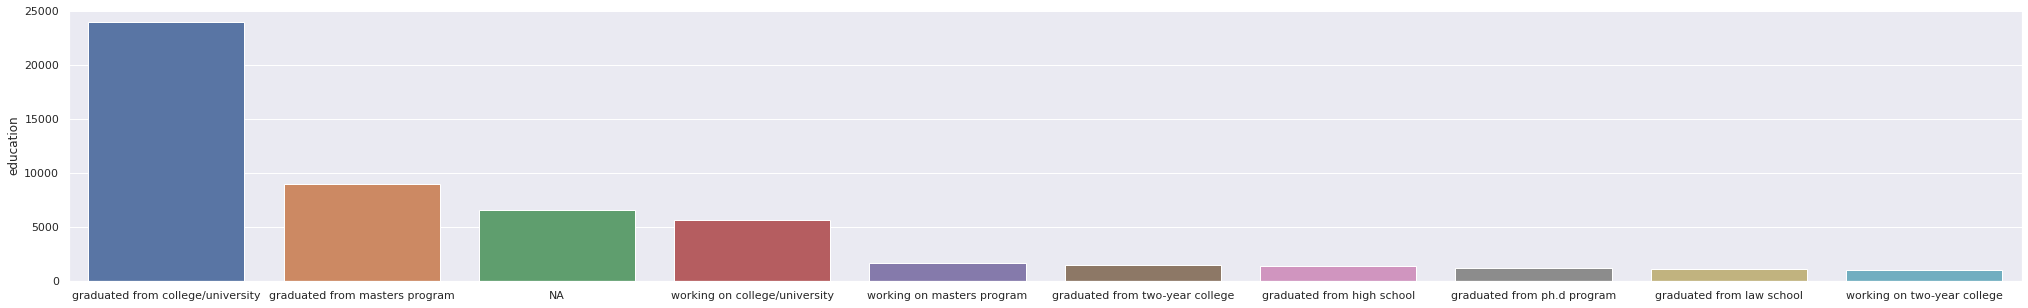

In [ ]:
sns.set(rc={'figure.figsize':(35,5)})
sns.barplot(x=df['education'].value_counts()[:10].index, y=df['education'].value_counts()[:10])

In [ ]:
df['education_cleaned'] = df['education'].map({
'graduated from college/university': 'undergraduate',
'graduated from masters program': 'graduate',        
'working on college/university': 'undergraduate',         
'working on masters program': 'graduate',            
'graduated from two-year college': 'undergraduate',       
'graduated from high school': 'high school',            
'graduated from ph.d program': 'graduate',           
'graduated from law school': 'graduate',             
'working on two-year college': 'undergraduate',           
'dropped out of college/university': 'high school',      
'working on ph.d program': 'graduate',                
'college/university': 'undergraduate',                     
'graduated from space camp': 'other',              
'dropped out of space camp': 'other',              
'graduated from med school': 'graduate',              
'working on space camp': 'other',                  
'working on law school': 'graduate',                  
'two-year college': 'undergraduate',                       
'working on med school': 'graduate',                  
'dropped out of two-year college': 'high school',        
'dropped out of masters program': 'undergraduate',         
'masters program': 'graduate',                        
'dropped out of ph.d program ': 'undergraduate',           
'dropped out of high school': 'other',             
'high school': 'high school',                             
'working on high school': 'high school',                  
'space camp': 'other',                              
'ph.d program ': 'graduate',                           
'law school': 'graduate',                              
'dropped out of law school': 'undergraduate',               
'dropped out of med school': 'undergraduate',               
'med school': 'graduate'}).fillna('NA')

In [ ]:
df['education_cleaned'].value_counts()

undergraduate    33469
graduate         15114
NA                6781
high school       2797
other             1785
Name: education_cleaned, dtype: int64

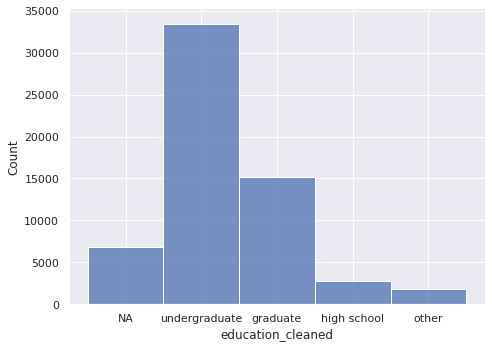

In [ ]:
sns.displot(x=df['education_cleaned'], height=5, aspect=7/5)

## Ethnicity

In [ ]:
df['ethnicity'].value_counts()[:20]

white                      32831
asian                       6134
NA                          5680
hispanic / latin            2823
black                       2008
other                       1706
hispanic / latin, white     1301
indian                      1077
asian, white                 811
white, other                 641
pacific islander             432
asian, pacific islander      395
native american, white       338
middle eastern               329
middle eastern, white        300
black, white                 298
pacific islander, white      156
hispanic / latin, other      138
black, other                 133
black, hispanic / latin      119
Name: ethnicity, dtype: int64

In [ ]:
df['ethnicity_white'] = [1 if 'white' in d else 0 for d in df['ethnicity']]
df['ethnicity_asian'] = [1 if 'asian' in d else 0 for d in df['ethnicity']]
df['ethnicity_hispanic'] = [1 if 'hispanic' in d else 0 for d in df['ethnicity']]
df['ethnicity_black'] = [1 if 'black' in d else 0 for d in df['ethnicity']]

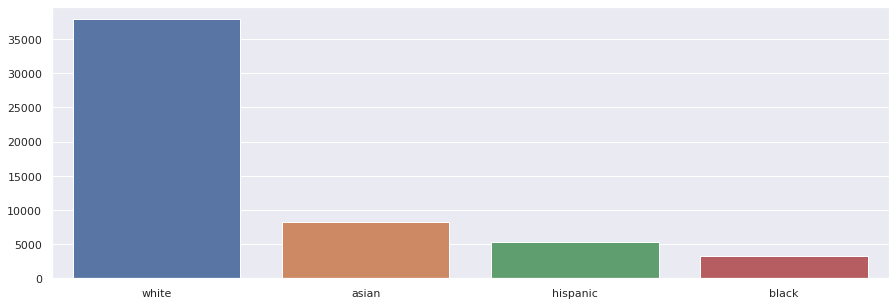

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=['white', 'asian', 'hispanic', 'black'],y=[sum(df['ethnicity_white']),sum(df['ethnicity_asian']),sum(df['ethnicity_hispanic']),sum(df['ethnicity_black'])])

In [ ]:
eths = defaultdict(int)
multis = defaultdict(int)

for d in df['ethnicity']:
  multis[len(d.split(','))] += 1
  for e in d.split(','):
    eths[e.strip()] += 1

In [ ]:
eths

defaultdict(int,
            {'NA': 5680,
             'asian': 8205,
             'black': 3328,
             'hispanic / latin': 5357,
             'indian': 1449,
             'middle eastern': 950,
             'native american': 1265,
             'other': 3567,
             'pacific islander': 1473,
             'white': 37882})

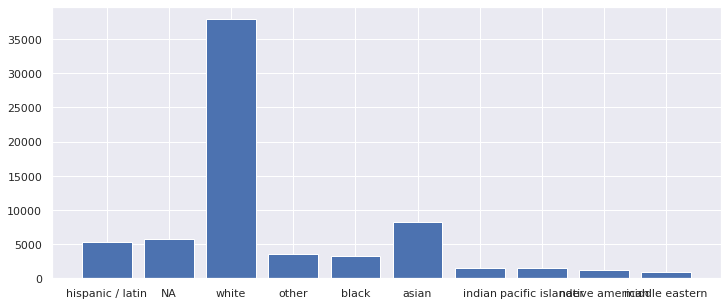

In [ ]:
plt.figure(figsize=(12,5))
plt.bar(range(len(eths)), list(eths.values()), align='center')
plt.xticks(range(len(eths)), list(eths.keys()))
plt.show()

In [ ]:
multis

defaultdict(int,
            {1: 53087,
             2: 5412,
             3: 1050,
             4: 234,
             5: 55,
             6: 18,
             7: 10,
             8: 14,
             9: 66})

## Height

In [ ]:
df['height'].describe()

count    59946.000000
mean        68.295281
std          3.994703
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

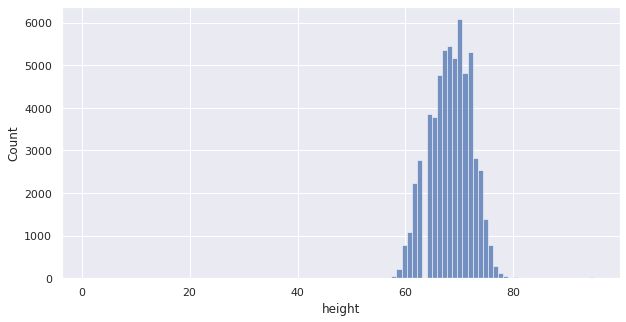

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.histplot(x='height', data=df, bins=100)

In [ ]:
df[df['height'] < 40]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned,drinks_cleaned,drugs_cleaned,education_cleaned,ethnicity_white,ethnicity_asian,ethnicity_hispanic,ethnicity_black
243,35,single,m,straight,average,NA,socially,sometimes,NA,white,36.0,150000,entertainment / media,2012-06-30-14-40,"san mateo, california",NA,likes dogs and likes cats,other but not too serious about it,leo and it&rsquo;s fun to think about,no,"english (fluently), esperanto (poorly)","well, i am a dork and i like it! i like art, f...",currently working at stanford. going to figure...,"painting, art in general, traveling on a budget.",you tell me.,"authors:paulo coelho, dostoevsky,kafka, tom ro...","coffee, art, freedom",all the random coincidences that seem to happe...,lately? studying classic films in my netflix q...,i like abba,"you like being spontaneous, you play music, si...",0,0,average,NA,NA,1,1,NA,1,0,0,0
1047,25,single,f,straight,NA,NA,often,often,working on space camp,"pacific islander, hispanic / latin",4.0,-1,artistic / musical / writer,2012-06-25-07-32,"san francisco, california",NA,has dogs and dislikes cats,other and laughing about it,cancer but it doesn&rsquo;t matter,yes,"english (fluently), spanish (poorly)",i love not dancing and portobello mushrooms. a...,walking around town left handed.,being online and starting collections. i am re...,my long fingers and ability to be awkward.,potato skins.,the six things i could always do without are: ...,"moosing, spain, and one of those sugar daddies.",watching netflix on my computer and uking.,i'm left-handed.,you are left-handed.,1,0,NA,NA,NA,1,1,other,0,0,1,0
7885,23,single,f,straight,used up,NA,NA,never,working on college/university,black,36.0,20000,student,2012-06-29-20-07,"san francisco, california",NA,likes dogs and likes cats,NA,NA,no,english (fluently),"hi, i'm kay. i just moved here recently from o...",i'm trying to major in photography. i wanna wo...,"taking pictures, making people smile, being th...",my red hair or my nose ring.,NA,food shelter water my laptop my family my baby...,how to help other people. i really enjoy cheer...,working :[,"shhhhhhhh, but i'm a nerd. i just bought starc...",you wanna be friends :],1,0,NA,NA,NA,NA,0,undergraduate,0,0,0,1
9386,32,single,f,straight,thin,mostly anything,desperately,NA,working on ph.d program,NA,6.0,-1,entertainment / media,2011-06-29-22-32,"san francisco, california",NA,likes dogs and has cats,agnosticism,NA,no,"english (fluently), french (okay), german (poo...",small teller of tall tales. nostalgiaphile. un...,entropologist/enigmatologist/muse/things that ...,the things i don't quit. but only because i te...,something about the eyes-to-face ratio. and th...,current train reading = miranda july's _no one...,they wouldn't be things. they would be people.,"most everything. sometimes (okay, maybe often)...",awake. but that's every night. i suppose that ...,i have no idea why i selected this username. (...,*you're so inclined. *oh! but if you're the s...,1,0,thin,anything,anything,1,NA,graduate,0,0,0,0
9516,36,single,m,straight,NA,NA,very often,never,graduated from college/university,NA,1.0,80000,science / tech / engineering,2012-06-28-14-18,"oakland, california",NA,likes dogs and has cats,judaism and laughing about it,leo and it&rsquo;s fun to think about,when drinking,"english (fluently), c++ (fluently), hebrew (po...",i'm a transplant from southern california with...,"living each day as if it'd be my last, and man...","writing, rambling, fixing anything thats break...","my otherwise perfect hair, my half-sleeve tatt...","i enjoy reading louis sachar, james burke, ala...",irish whiskey broadband internet my iphone a d...,"zombies, and ways not to get eaten by them. m...",peering through the bottom o

In [ ]:
df[df['height'] == 1]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned,drinks_cleaned,drugs_cleaned,education_cleaned,ethnicity_white,ethnicity_asian,ethnicity_hispanic,ethnicity_black
9516,36,single,m,straight,NA,NA,very often,never,graduated from college/university,NA,1.0,80000,science / tech / engineering,2012-06-28-14-18,"oakland, california",NA,likes dogs and has cats,judaism and laughing about it,leo and it&rsquo;s fun to think about,when drinking,"english (fluently), c++ (fluently), hebrew (po...",i'm a transplant from southern california with...,"living each day as if it'd be my last, and man...","writing, rambling, fixing anything thats break...","my otherwise perfect hair, my half-sleeve tatt...","i enjoy reading louis sachar, james burke, ala...",irish whiskey broadband internet my iphone a d...,"zombies, and ways not to get eaten by them. m...",peering through the bottom of a whiskey glass....,"i can't stand online dating, or the stigma att...",if you're a ninja (with skills) or a pirate. y...,0,0,NA,NA,NA,1,0,undergraduate,0,0,0,0


In [ ]:
df[df['height'] > 90]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned,drinks_cleaned,drugs_cleaned,education_cleaned,ethnicity_white,ethnicity_asian,ethnicity_hispanic,ethnicity_black
2643,41,single,m,straight,jacked,NA,NA,never,working on two-year college,other,95.0,1000000,student,2012-06-21-21-22,"hercules, california",has kids,NA,other,gemini,NA,"english (okay), icelandic (fluently), ancient ...","i like to cook and eat, i especially greek, in...",i am currently a student. i hurt my knee and h...,misplacing things being too nice time travel d...,if the sun is out and i dont have sunglasses o...,"curb your enthusiasm, coast to coast, independ...",water sun humor guitar food,how did we as humans get here and where did we...,NA,i survived catholic school. that i love you.,you also like long walks on short piers.....yo...,0,0,NA,NA,NA,NA,0,undergraduate,0,0,0,0
3168,31,seeing someone,f,straight,jacked,NA,often,NA,college/university,white,93.0,1000000,banking / financial / real estate,2012-06-10-21-16,"san francisco, california",NA,has dogs and likes cats,other but not too serious about it,taurus and it&rsquo;s fun to think about,no,"english (fluently), norwegian (poorly)","if you plan on contacting me, read my freakin...","enjoying it...with good friends, good food and...",-making fun of stupid people and bad drivers -...,probably that i can come off sweet and then wh...,i'm a foodie fo'sho. i like almost every type ...,"screw 6, i'll give you 13, since it's a much b...",the weekend and what i plan on doing each and ...,probably eating dinner with the boyfriend and ...,i watch jersey shore.,you want to and have something semi-interestin...,1,0,NA,NA,NA,1,NA,undergraduate,1,0,0,0
4844,18,single,m,straight,athletic,NA,not at all,never,high school,middle eastern,94.0,-1,student,2012-02-07-07-00,"san francisco, california",doesn't have kids,NA,islam,aquarius,no,english,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,athletic,NA,NA,0,0,high school,0,0,0,0
5448,31,single,m,straight,used up,mostly other,socially,NA,graduated from college/university,"asian, middle eastern, black, native american,...",95.0,1000000,NA,2012-06-29-08-35,"oakland, california",NA,likes dogs and likes cats,judaism and laughing about it,scorpio,NA,"english (poorly), english (poorly), english (p...",everything on this page is a lie. including ^t...,"getting older but not getting old. planning, p...",rocking out and not sleeping enough. teaching ...,they probably notice first that i'm in their h...,some of my favorites in fiction are dostoevsky...,outside of things i need for staving off entro...,paradoxes. puzzles. words. prime factors. grad...,"friday is just like any other night. ideally, ...",this is either using one of those newfangled d...,you are a bisexual steamboat captain who likes...,0,0,NA,other,other,1,NA,undergraduate,1,1,1,1
7270,24,single,m,straight,jacked,strictly anything,socially,sometimes,working on college/university,"asian, middle eastern, black, native american,...",95.0,1000000,student,2011-12-30-15-01,"san francisco, california",NA,likes dogs and likes cats,agnosticism but not too serious about it,capricorn but it doesn&rsquo;t matter,NA,"english (fluently), spanish (okay)",nut[erik parker]shell,".........nothing......... naw, fa real tho... ...",everything that ever existed ever!,is that i radiate pure awesomeness from my fac...,books: texts which cinematic-ally paint awesom...,NA,future plans of film industry success,NA,NA,NA,0,0,NA,anything,anything,1,1,undergraduate,1,1,1,1
7855,19,single,m,bisexual,overweight,mostly other,often,often,graduated from high school,black,95.0,20000,NA,2011-07-20-21-53,"san leandro, california",NA,has dogs,NA,gemini but it doesn&rsquo;t matter,sometimes,english,NA,NA,NA,NA,NA,NA,NA,NA,

## Income

In [ ]:
df['income'].describe()

count      59946.000000
mean       20033.222534
std        97346.192104
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

In [ ]:
len(df[df['income'] != -1]['income'])

11504

In [ ]:
df[df['income'] != -1]['income'].describe()

count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64

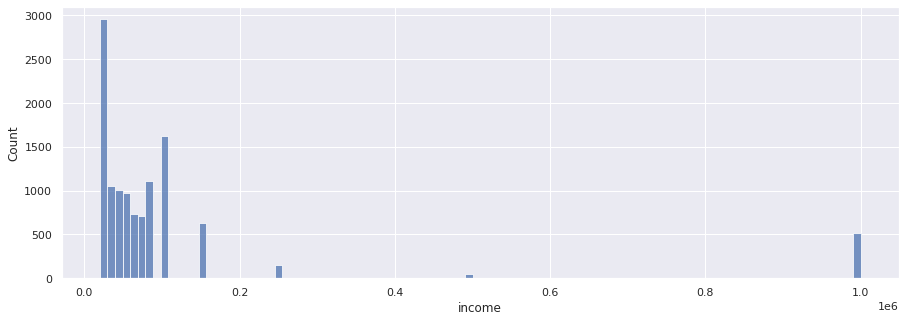

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.histplot(x=df[df['income'] != -1]['income'], bins=100)

In [ ]:
df[df['income'] == 1000000]

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned,drinks_cleaned,drugs_cleaned,education_cleaned,ethnicity_white,ethnicity_asian,ethnicity_hispanic,ethnicity_black
179,26,single,m,gay,used up,anything,often,never,dropped out of college/university,black,78.0,1000000,artistic / musical / writer,2012-06-26-15-13,"san francisco, california",NA,likes dogs and likes cats,NA,virgo but it doesn&rsquo;t matter,no,english,brenda walsh meets cher horowitz meets buffy s...,as of the past two years i've been establishin...,mispronouncing sorta kinda big words and then ...,that i'm sortakinda tall and black. and loud. ...,"the regulars. alfred hitchcock,david lynch,joh...",creative thought critical thinkers cats plants...,life.,socializing. poppin my coochie on the dance fl...,is that i try on all of my clothes after washi...,if you wanna go out and get some damn fine pie...,0,1,NA,anything,anything,1,0,high school,0,0,0,1
391,32,available,f,straight,skinny,mostly vegetarian,socially,never,graduated from college/university,"hispanic / latin, other",63.0,1000000,education / academia,2012-05-10-21-33,"oakland, california",has kids,likes dogs and has cats,NA,NA,when drinking,"english (fluently), spanish (fluently)",feeling hella artsy lately. and feeling the n...,trying to figure out the all the secrets of li...,cooking. dancing. joking around. thinking deep...,"the nose ring, the big hair, the colors. only ...","i don't have much time to read, unless it's th...",my lovelies. music. food. earrings & bangles (...,"l'amore. dancing freedom, or lack of. justice,...",out dancing or in watching a movie or daydream...,i'm pretty granola. urban granola to be exact!...,"you have a nice smile, as in the sincere and/o...",1,0,skinny,vegetarian,vegetarian,1,0,undergraduate,0,0,1,0
442,26,single,m,straight,rather not say,mostly anything,NA,often,dropped out of space camp,NA,71.0,1000000,rather not say,2012-06-12-16-14,"san francisco, california",doesn't want kids,likes dogs and dislikes cats,other and laughing about it,aquarius and it&rsquo;s fun to think about,no,"english, afrikaans, basque",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,NA,anything,anything,NA,1,other,0,0,0,0
460,25,single,m,straight,thin,strictly anything,socially,NA,working on ph.d program,white,72.0,1000000,education / academia,2012-06-28-07-10,"berkeley, california","doesn't have kids, but might want them",likes dogs and likes cats,atheism,aries but it doesn&rsquo;t matter,no,"english (fluently), russian (fluently), finnis...",i'm kinda maybe in finland until the middle of...,"gettin' a education. incidentally, that's why ...",i can usually guess the air temperature within...,i smell like a tropical cloud forest. sometime...,i should have some sort of substance in this p...,1) coniferous trees. 2) fresh colorful delicio...,"humans and all our amazing feats, science and ...","going out to do something new and exciting, or...",this question can't be answered. as soon as i ...,"message me if you suspect you're a great girl,...",0,0,thin,anything,anything,1,NA,graduate,1,0,0,0
512,25,single,m,straight,fit,strictly anything,socially,never,graduated from space camp,white,76.0,1000000,other,2012-06-29-20-39,"mountain view, california",NA,NA,atheism and laughing about it,NA,no,english,i live for new perspectives on old ideas. wel...,personally? i do a lot of different things. i ...,"being tall. i'm pretty observant as well, and ...",yep... still tall. i've also gotten comments a...,"i like quirky things, things with deep charact...","the open road, question marks, halvah, opposab...",what i'm going to build next. how the world w...,"catching live bands at coffee shops, writing l...","about two weeks ago, i got hit, full-force wit...","if you're up for

In [ ]:
# sns.displot(x=df[df['income'] == 1000000]['job_cleaned'], aspect=25/5)

## Job

In [ ]:
df['job'].value_counts()

NA                                   8198
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [ ]:
df['job_cleaned'] = df['job'].map({
    'NA':'NA',
    'student':'student',
    'science / tech / engineering':'science',
    'computer / hardware / software': 'computer',
    'artistic / musical / writer': 'artistic',
    'sales / marketing / biz dev': 'sales',
    'medicine / health': 'medicine',
    'education / academia': 'education',
    'executive / management': 'executive',
    'banking / financial / real estate': 'banking',
    'entertainment / media': 'entertainment',
    'law / legal services': 'law',
    'hospitality / travel': 'hospitality',
    'construction / craftsmanship': 'construction'
}).fillna('other')

In [ ]:
df['job_cleaned'].value_counts()

other            10631
NA                8198
student           4882
science           4848
computer          4709
artistic          4439
sales             4391
medicine          3680
education         3513
executive         2373
banking           2266
entertainment     2250
law               1381
hospitality       1364
construction      1021
Name: job_cleaned, dtype: int64

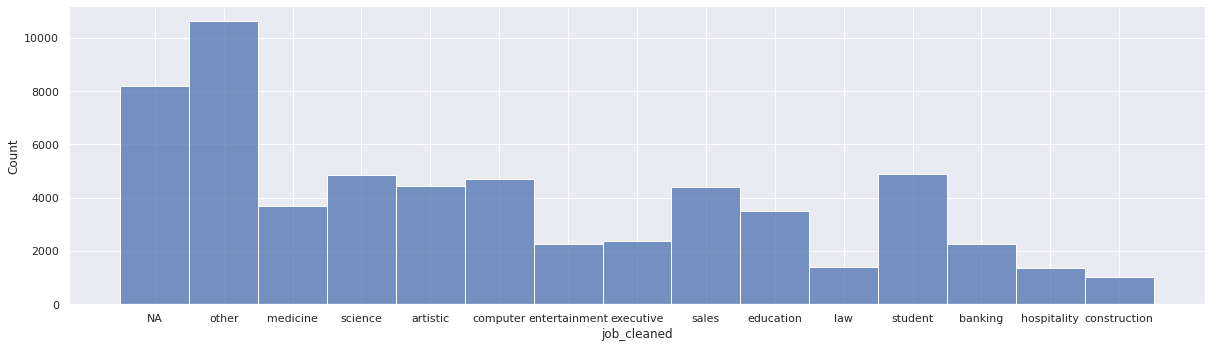

In [ ]:
sns.displot(x=df['job_cleaned'], height=5, aspect=17/5)

In [ ]:
df[df['job_cleaned'] == 'artistic']

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,sex_cleaned,orientation_cleaned,body_type_cleaned,diet_categories,diet_cleaned,drinks_cleaned,drugs_cleaned,education_cleaned,ethnicity_white,ethnicity_asian,ethnicity_hispanic,ethnicity_black,job_cleaned
7,27,single,f,straight,thin,strictly other,often,NA,working on masters program,white,63.0,-1,artistic / musical / writer,2012-03-31-03-49,"san francisco, california",NA,likes dogs,agnosticism and laughing about it,leo and it&rsquo;s fun to think about,no,"english, spanish (okay)","i am...a cleveland native, lived in marietta (...",enjoying it...trying to accomplish just a few ...,"painting, smiling, and accepting people for wh...","not too sure....smile, laugh, eyes...the usual...","books: skinny legs and all, popco, stranger in...",1. friends 2. painting 3. stargate 4. learning...,"the progression of time, the process of learni...","in ohio, i'd be chillin with my lovelies smart...",i'm better at written communication than verba...,"you're laid-back, non-controlling, can shrug o...",1,0,thin,other,other,1,NA,graduate,1,0,0,0,artistic
11,28,single,m,straight,thin,mostly anything,not at all,sometimes,graduated from college/university,white,71.0,-1,artistic / musical / writer,2012-06-29-19-24,"walnut creek, california",NA,NA,other,aquarius and it&rsquo;s fun to think about,sometimes,english,i work for a software company in redwood city ...,college graduate from sfsu ba communications ...,check out my track http://www.youtube.com/watc...,"working in isolation, away from any constraint...","anything by bukowski, office space, epicly lat...",goals,my future,working,check out my new hit track!! dj pm big l put i...,"you are attracted to me, like comedy, and if y...",0,0,thin,anything,anything,0,1,undergraduate,1,0,0,0,artistic
69,33,single,f,straight,fit,mostly other,socially,never,working on space camp,other,70.0,50000,artistic / musical / writer,2012-06-29-09-43,"san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,other and laughing about it,leo and it&rsquo;s fun to think about,no,"english (fluently), spanish (okay)","i'm awesome, find out for yourself",taking it to the next level,"arts n crafts, making people laughs playing w...","my tits, my laugh, my smile .... ;)",i have recently reactivated my passion for rea...,in order of importance: #1 snuggles #2 massag...,"world travel, self exploration... how to make ...",all dressed up ready for you to show me a good...,i occasionally read the missed connections on ...,you have something clever to say... i really e...,1,0,fit,other,other,1,0,other,0,0,0,0,artistic
74,39,seeing someone,f,gay,NA,NA,socially,sometimes,graduated from college/university,white,72.0,-1,artistic / musical / writer,2012-06-23-08-30,"san francisco, california",doesn't want kids,has cats,atheism and laughing about it,gemini but it doesn&rsquo;t matter,no,english (fluently),san francisco hipster. for starters. there's a...,i recently finished my first book and am in th...,"conversation, writing, thinking on my feet and...","my hair, which is primarily blond/pink/red/pur...","bookwise, i'm a sucker for memoirs. i usually ...","books. my cat (though i keep her at home, duh)...","my writing, love, sex, and all the things i ca...",at a comedy show or a play at a local theater ...,"""against all odds"" still gets me where it hurt...",if you think your damage is compatible with mi...,1,1,NA,NA,NA,1,1,undergraduate,1,0,0,0,artistic
97,21,single,f,straight,average,mostly anything,rarely,never,working on college/university,white,67.0,20000,artistic / musical / writer,2012-06-24-06-38,"san francisco, california",doesn't want kids,likes dogs and likes cats,atheism but not too serious about it,virgo and it&rsquo;s fun to think about,no,english (fluently),"giv

## Location

In [ ]:
df['location'].value_counts()[:50]

san francisco, california          31064
oakland, california                 7214
berkeley, california                4212
san mateo, california               1331
palo alto, california               1064
alameda, california                  910
san rafael, california               755
hayward, california                  747
emeryville, california               738
redwood city, california             693
daly city, california                681
san leandro, california              651
walnut creek, california             644
vallejo, california                  558
menlo park, california               479
richmond, california                 424
south san francisco, california      416
mountain view, california            384
novato, california                   369
burlingame, california               361
pleasant hill, california            347
castro valley, california            345
stanford, california                 341
el cerrito, california               325
pacifica, califo

In [ ]:
df['location_cleaned'] = [1 if d == 'san francisco, california' else 0 for d in df['location']]

In [ ]:
df['location_cleaned'].value_counts()

1    31064
0    28882
Name: location_cleaned, dtype: int64

## Offspring

In [ ]:
df['offspring'].value_counts()

NA                                         35561
doesn't have kids                           7560
doesn't have kids, but might want them      3875
doesn't have kids, but wants them           3565
doesn't want kids                           2927
has kids                                    1883
has a kid                                   1881
doesn't have kids, and doesn't want any     1132
has kids, but doesn't want more              442
has a kid, but doesn't want more             275
has a kid, and might want more               231
wants kids                                   225
might want kids                              182
has kids, and might want more                115
has a kid, and wants more                     71
has kids, and wants more                      21
Name: offspring, dtype: int64

In [ ]:
df['offspring_cleaned'] = df['offspring'].map({
    "doesn't have kids":0,
    "doesn't have kids, but might want them":0,
    "doesn't have kids, but wants them":0,
    "doesn't want kids":0,
    "doesn't have kids, and doesn't want any":0,
    "wants kids":0,
    "might want kids":0,
    "NA":"NA"
}).fillna(1)

In [ ]:
df['offspring_cleaned'].value_counts()

NA    35561
0     19466
1      4919
Name: offspring_cleaned, dtype: int64

## Pets

In [ ]:
df['pets'].value_counts()

NA                                 19921
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [ ]:
df['pets_cleaned'] = df['pets'].map({
    'has dogs': 1,
    'has dogs and likes cats': 1,
    'has dogs and has cats': 1,
    'has cats': 1,
    'has dogs and dislikes cats': 1,
    "NA":"NA"
}).fillna(0)

In [ ]:
df['pets_cleaned'].value_counts()

0     30126
NA    19921
1      9899
Name: pets_cleaned, dtype: int64

## Religion

In [ ]:
df['religion'].value_counts()

NA                                            20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
judaism and 

In [ ]:
df['religion_cleaned'] = [d.split()[0] if (len(d.split()) > 1) else d for d in df['religion']]

In [ ]:
df['religion_cleaned'].value_counts()

NA              20226
agnosticism      8812
other            7743
atheism          6985
christianity     5787
catholicism      4758
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: religion_cleaned, dtype: int64

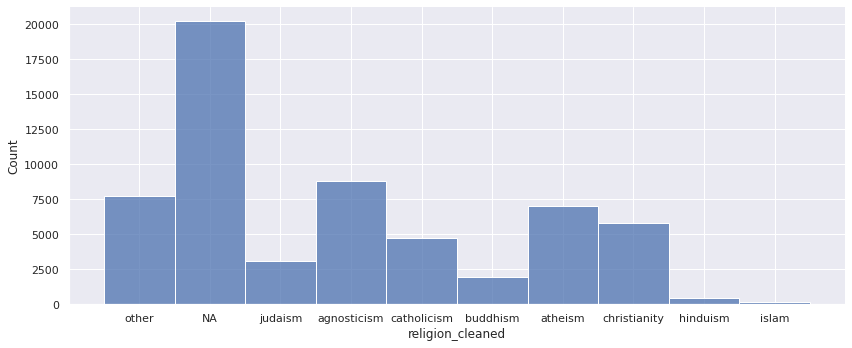

In [ ]:
sns.displot(x=df['religion_cleaned'], aspect=12/5)

## Sign

In [ ]:
df['sign'].value_counts()

NA                                               11056
gemini and it&rsquo;s fun to think about          1782
scorpio and it&rsquo;s fun to think about         1772
leo and it&rsquo;s fun to think about             1692
libra and it&rsquo;s fun to think about           1649
taurus and it&rsquo;s fun to think about          1640
cancer and it&rsquo;s fun to think about          1597
pisces and it&rsquo;s fun to think about          1592
sagittarius and it&rsquo;s fun to think about     1583
virgo and it&rsquo;s fun to think about           1574
aries and it&rsquo;s fun to think about           1573
aquarius and it&rsquo;s fun to think about        1503
virgo but it doesn&rsquo;t matter                 1497
leo but it doesn&rsquo;t matter                   1457
cancer but it doesn&rsquo;t matter                1454
gemini but it doesn&rsquo;t matter                1453
taurus but it doesn&rsquo;t matter                1450
aquarius but it doesn&rsquo;t matter              1408
libra but 

In [ ]:
df['sign_cleaned'] = [d.split()[0] if (len(d.split()) > 1) else d for d in df['sign']]

In [ ]:
df['sign_cleaned'].value_counts()

NA             11056
leo             4374
gemini          4310
libra           4207
cancer          4206
virgo           4141
taurus          4140
scorpio         4134
aries           3989
pisces          3946
sagittarius     3942
aquarius        3928
capricorn       3573
Name: sign_cleaned, dtype: int64

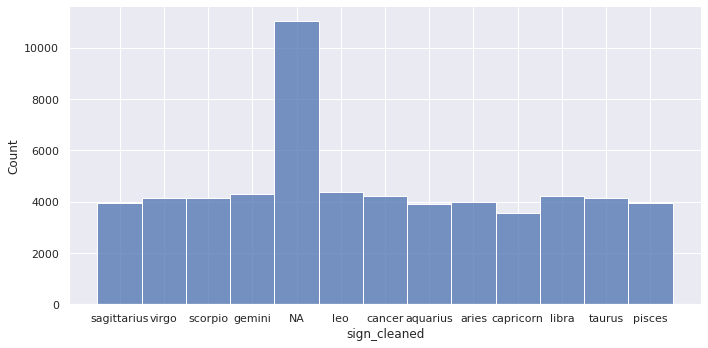

In [ ]:
sns.displot(x=df['sign_cleaned'], aspect=10/5)

In [ ]:
df['sign_importance'] = [d.split()[len(d.split())-1] if (len(d.split()) > 1) else 'NA' for d in df['sign']]

In [ ]:
df['sign_importance'].value_counts()

NA        23180
about     19333
matter    16758
lot         675
Name: sign_importance, dtype: int64

In [ ]:
df['sign_importance_cleaned'] = df['sign_importance'].map({
    'NA':'NA',
    'about': 1, 
    'matter':0,
    'lot':1
})

In [ ]:
df['sign_importance_cleaned'].value_counts()

NA    23180
1     20008
0     16758
Name: sign_importance_cleaned, dtype: int64

## Smokes

In [ ]:
df['smokes'].value_counts()

no                43896
NA                 5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

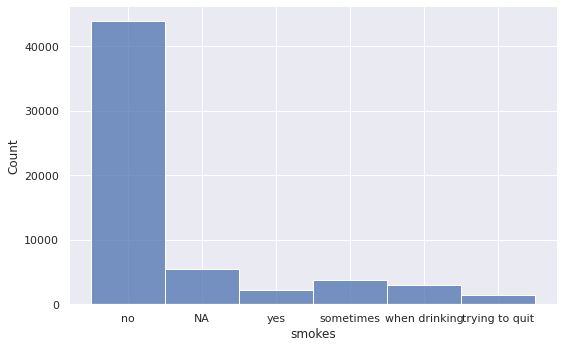

In [ ]:
sns.displot(x=df['smokes'], aspect=8/5)

In [ ]:
df['smokes_cleaned'] = df['smokes'].map({
    'no':0,
    'NA':'NA'
}).fillna(1)

In [ ]:
df['smokes_cleaned'].value_counts()

0     43896
1     10538
NA     5512
Name: smokes_cleaned, dtype: int64

## Speaks

In [ ]:
df['speaks'].value_counts()[:50]

english                                                    21828
english (fluently)                                          6628
english (fluently), spanish (poorly)                        2059
english (fluently), spanish (okay)                          1917
english (fluently), spanish (fluently)                      1288
english, spanish                                             859
english (fluently), french (poorly)                          756
english, spanish (okay)                                      655
english, spanish (poorly)                                    609
english (fluently), chinese (fluently)                       535
english (fluently), french (okay)                            532
english (fluently), chinese (okay)                           430
english (poorly)                                             310
english (okay)                                               306
english, chinese                                             306
english (fluently), germa

In [ ]:
langs = defaultdict()

In [ ]:
df['num_languages'] = [len(d.split(',')) for d in df['speaks']]

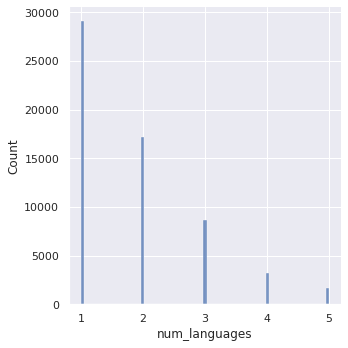

In [ ]:
sns.displot(x=df['num_languages'])

In [ ]:
df['multilingual'] = [1 if d > 1 else 0 for d in df['num_languages']]

In [ ]:
langs = defaultdict(int)

for d in df['speaks']:
  for e in re.sub(r'\([^)]*\)', '', d).split(','):
    langs[e.strip()] += 1

In [ ]:
sorted(langs.items(), key = lambda kv: kv[1], reverse=True)[:50]

[('english', 60350),
 ('spanish', 16315),
 ('french', 7852),
 ('chinese', 3663),
 ('german', 3083),
 ('japanese', 2188),
 ('italian', 2181),
 ('c++', 1773),
 ('russian', 1283),
 ('portuguese', 1074),
 ('other', 929),
 ('sign language', 829),
 ('hebrew', 805),
 ('tagalog', 768),
 ('hindi', 751),
 ('arabic', 589),
 ('korean', 567),
 ('latin', 478),
 ('vietnamese', 400),
 ('lisp', 355),
 ('farsi', 316),
 ('swedish', 267),
 ('thai', 239),
 ('dutch', 238),
 ('yiddish', 209),
 ('greek', 207),
 ('ancient greek', 183),
 ('swahili', 172),
 ('polish', 157),
 ('turkish', 155),
 ('indonesian', 138),
 ('urdu', 132),
 ('irish', 129),
 ('czech', 125),
 ('danish', 124),
 ('esperanto', 117),
 ('tamil', 103),
 ('sanskrit', 102),
 ('norwegian', 95),
 ('hawaiian', 93),
 ('romanian', 88),
 ('hungarian', 88),
 ('afrikaans', 87),
 ('persian', 81),
 ('bengali', 76),
 ('catalan', 71),
 ('ukrainian', 70),
 ('serbian', 68),
 ('croatian', 62),
 ('khmer', 52)]

## Essays

In [ ]:
for i in range(10):
  title = 'essay' + str(i)
  newTitle = title + '_length'
  df[newTitle] = [len(d) for d in df[title]]

In [ ]:
for i in range(10):
  title = 'essay' + str(i)
  newTitle = title + '_length'
  print(df[df[title] != 'NA'][newTitle].describe())

count    54458.000000
mean       634.648536
std        663.878709
min          1.000000
25%        222.000000
50%        455.000000
75%        837.000000
max      36527.000000
Name: essay0_length, dtype: float64
count    52374.000000
mean       256.378470
std        280.466259
min          1.000000
25%         80.000000
50%        178.000000
75%        333.000000
max       6863.000000
Name: essay1_length, dtype: float64
count    50308.000000
mean       160.238471
std        179.201454
min          1.000000
25%         52.000000
50%        110.000000
75%        207.000000
max       5752.000000
Name: essay2_length, dtype: float64
count    48470.000000
mean        88.129503
std        115.998910
min          1.000000
25%         26.000000
50%         53.000000
75%        110.000000
max       4074.000000
Name: essay3_length, dtype: float64
count    49409.000000
mean       584.249448
std        557.391902
min          1.000000
25%        213.000000
50%        435.000000
75%        791.00000

In [ ]:
for i in range(10):
  title = 'essay' + str(i)
  newTitle = title + '_length'
  print(df[df[newTitle] == max(df[newTitle])][title].values)

['before i say anything, can i offer, please check out   the book, anastasia, by megre, the ringing cedar series, and the films, "zeitgeist", "kymatica", the esoteric agenda and "thrive" able to be seen on youtube  am reikiteacher redwood on facebook (where you may find more information on my wall).  ringing a few bells  awakening...krysthl-a ...melchizedek...heinlein...nacaals..."serpent of life"... egypt... the power of love is stronger than you know ("not romantic love" but real love)  unlike many here who select, "seeking friends", as one of their options, and who spurn those that don\'t meet their fantasy ideal romantic partner, i am open to any and all manner of associations that are meant to be (that feel "right" or "true").  heya, like to read? here\'s a little something. use in moderation now. this profile is like a refrigerator. there\'s something in it you might consume at different times, but consuming the whole thing at one sitting would be a lot to digest. here goes...  a

In [ ]:
df["full_essay"] = [" \n ".join([df[f'essay{i}'].iloc[j] for i in range(10)]) for j in range(len(df))]

In [ ]:
df["full_essay_length"] = [len(d) for d in df["full_essay"]]

In [ ]:
df["full_essay_length"].describe()

count    59946.000000
mean      2041.994428
std       1686.087255
min         37.000000
25%        923.000000
50%       1710.000000
75%       2745.000000
max      71291.000000
Name: full_essay_length, dtype: float64

In [ ]:
df[df['full_essay_length'] == 71291]['full_essay'].values[0]

'before i say anything, can i offer, please check out   the book, anastasia, by megre, the ringing cedar series, and the films, "zeitgeist", "kymatica", the esoteric agenda and "thrive" able to be seen on youtube  am reikiteacher redwood on facebook (where you may find more information on my wall).  ringing a few bells  awakening...krysthl-a ...melchizedek...heinlein...nacaals..."serpent of life"... egypt... the power of love is stronger than you know ("not romantic love" but real love)  unlike many here who select, "seeking friends", as one of their options, and who spurn those that don\'t meet their fantasy ideal romantic partner, i am open to any and all manner of associations that are meant to be (that feel "right" or "true").  heya, like to read? here\'s a little something. use in moderation now. this profile is like a refrigerator. there\'s something in it you might consume at different times, but consuming the whole thing at one sitting would be a lot to digest. here goes...  a 

## Interactions

### Gender Differences

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


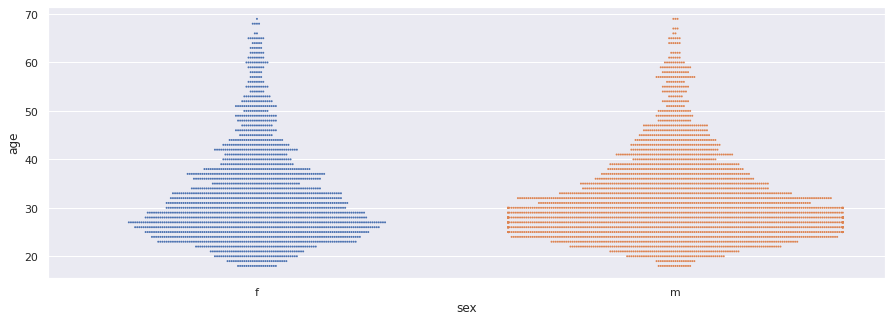

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.swarmplot(x='sex', y='age', data=df[:5000], s=2)

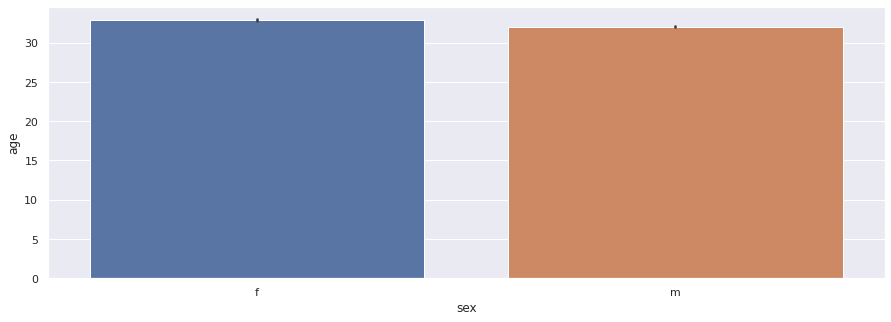

In [ ]:
sns.barplot(x='sex', y='age', data=df)

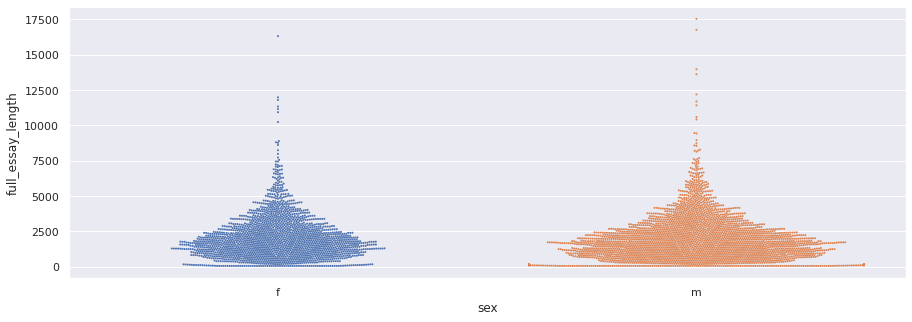

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
sns.swarmplot(x='sex', y='full_essay_length', data=df[:5000], s=2)

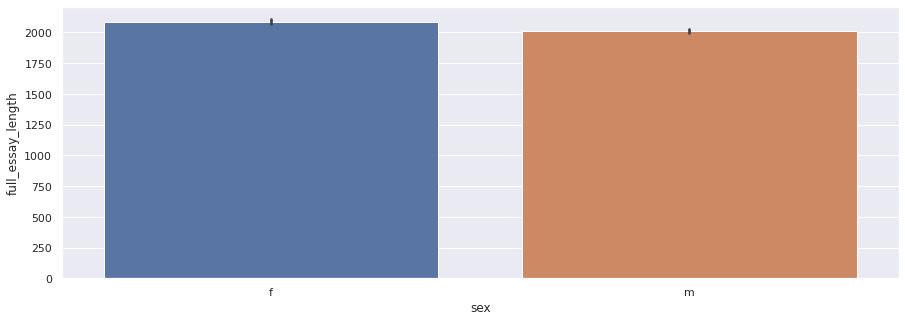

In [ ]:
sns.barplot(x='sex', y='full_essay_length', data=df)

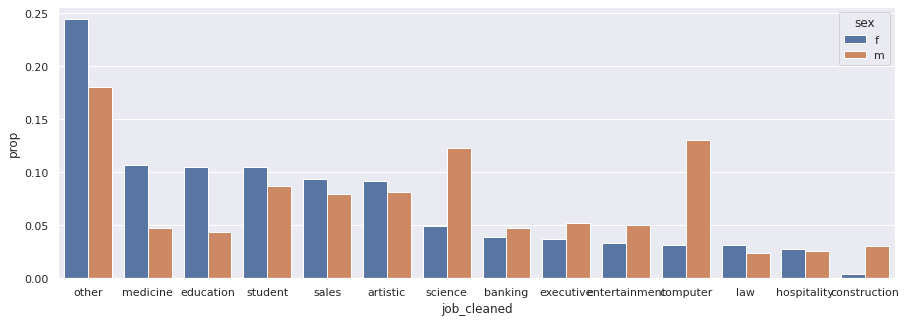

In [ ]:
(df[df['job_cleaned'] != 'NA']['job_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='job_cleaned', y='prop', hue='sex'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


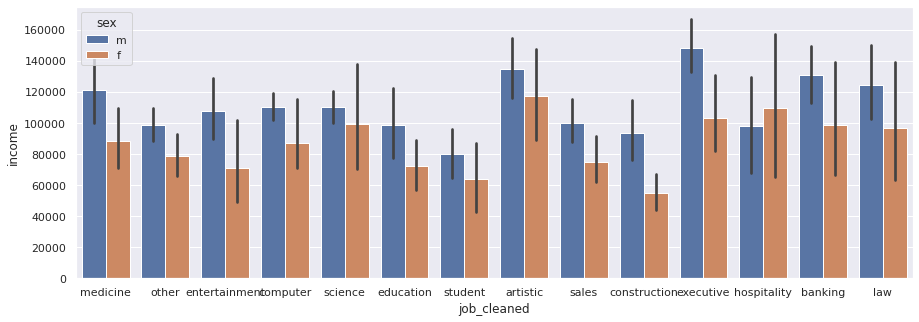

In [ ]:
sns.barplot(x='job_cleaned', y='income', hue='sex', data=df[df['job_cleaned'] != 'NA'][df['income'] != -1])

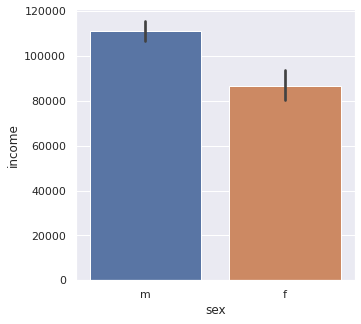

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x='sex', y='income', data=df[df['income'] != -1])

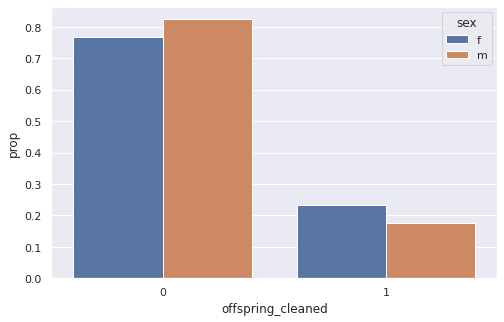

In [ ]:
(df[df['offspring_cleaned'] != 'NA']['offspring_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='offspring_cleaned', y='prop', hue='sex'))

### Education, Income, Job, Location

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


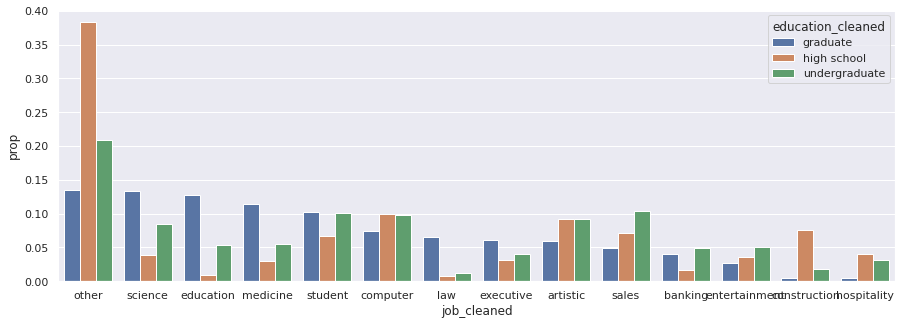

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
(df[df['job_cleaned'] != 'NA']['job_cleaned']
 .groupby(df[df['education_cleaned'] != 'NA'][df['education_cleaned'] != 'other']['education_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='job_cleaned', y='prop', hue='education_cleaned'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


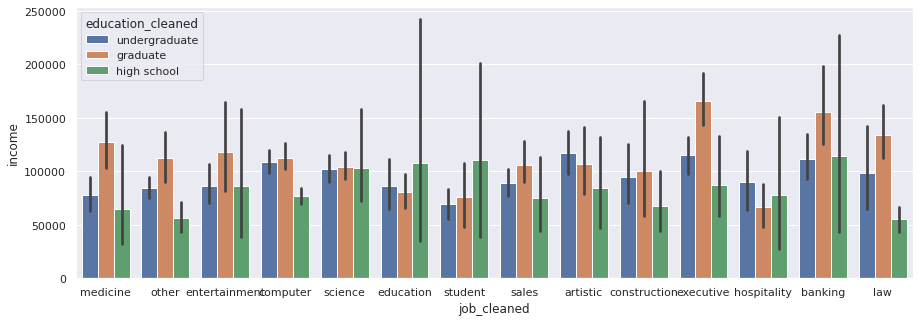

In [ ]:
sns.barplot(x='job_cleaned', y='income', hue='education_cleaned', data=df[df['job_cleaned'] != 'NA'][df['education_cleaned'] != 'other'][df['income'] != -1][df['education_cleaned'] != 'NA'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


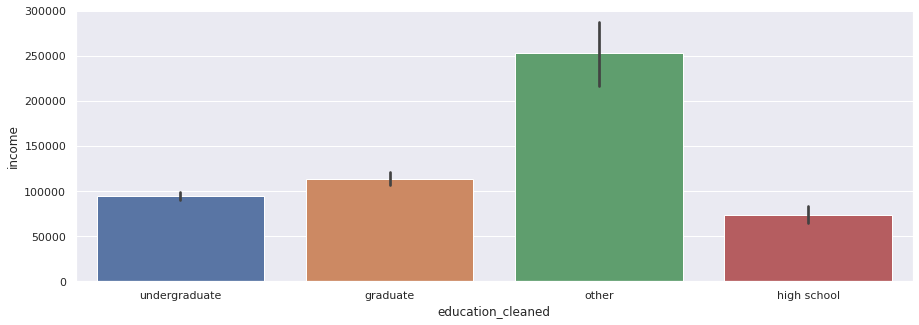

In [ ]:
sns.barplot(x='education_cleaned', y='income', data=df[df['income'] != -1][df['education_cleaned'] != 'NA'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; yo

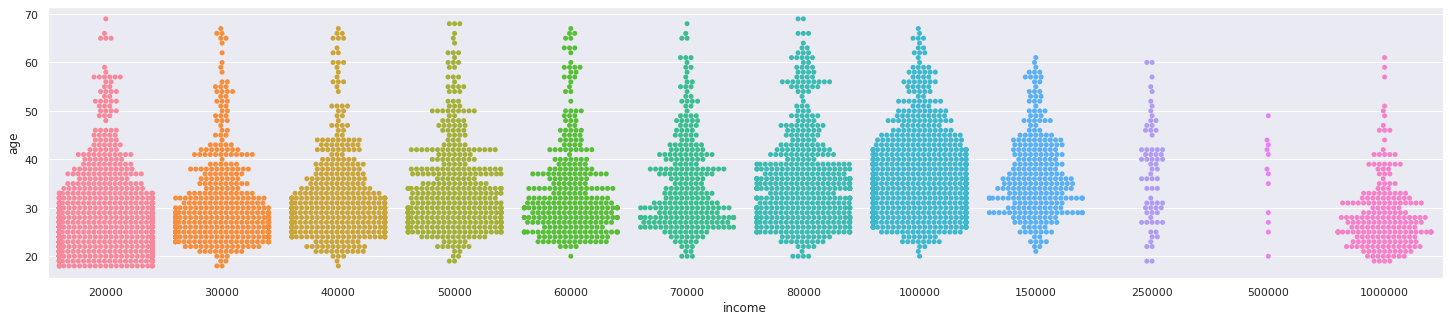

In [ ]:
sns.set(rc={'figure.figsize':(25,5)})
sns.swarmplot(x='income', y='age', data=df[df['income'] != -1][:5000])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


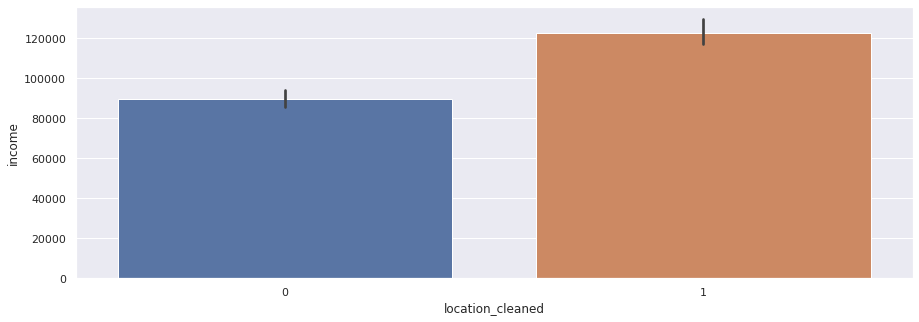

In [ ]:
sns.barplot(x='location_cleaned', y='income', data=df[df['income'] != -1][df['location_cleaned'] != 'NA'])

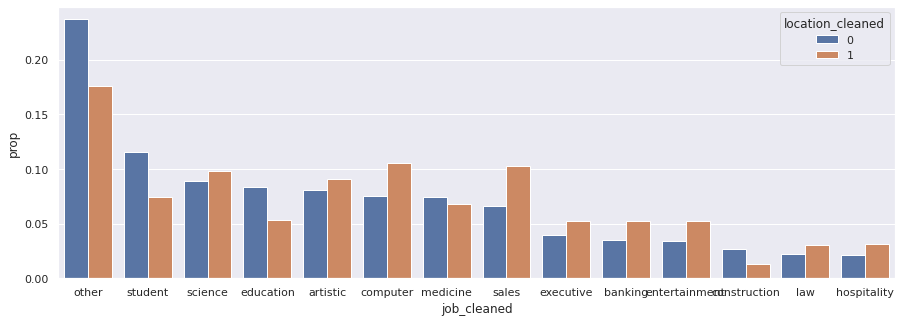

In [ ]:
(df[df['job_cleaned'] != 'NA']['job_cleaned']
 .groupby(df[df['location_cleaned'] != 'NA']['location_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='job_cleaned', y='prop', hue='location_cleaned'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


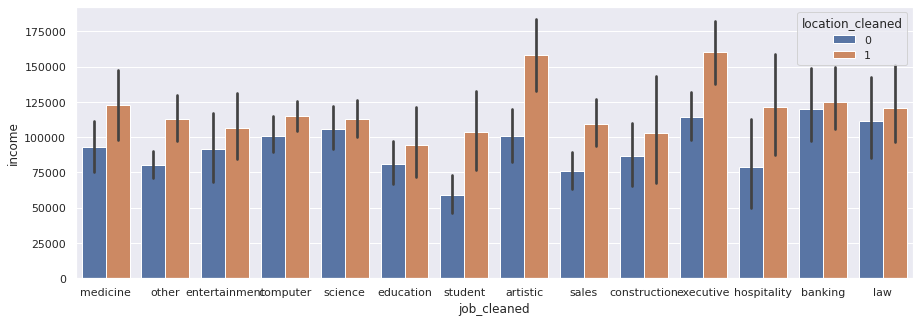

In [ ]:
sns.barplot(x='job_cleaned', y='income', hue='location_cleaned', data=df[df['income'] != -1][df['location_cleaned'] != 'NA'][df['job_cleaned'] != 'NA'])

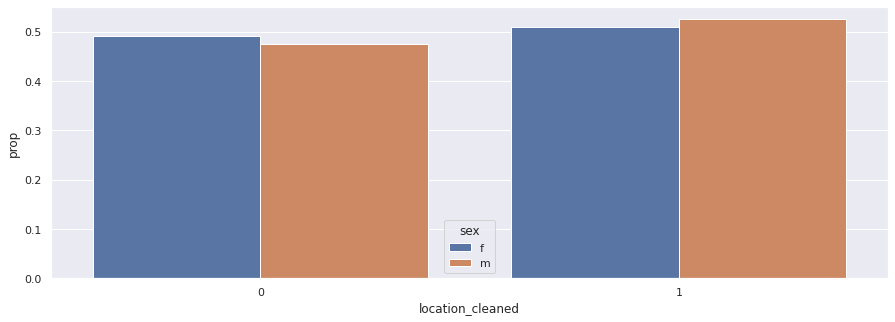

In [ ]:
(df[df['location_cleaned'] != 'NA']['location_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='location_cleaned', y='prop', hue='sex'))

### Body Type & Diet

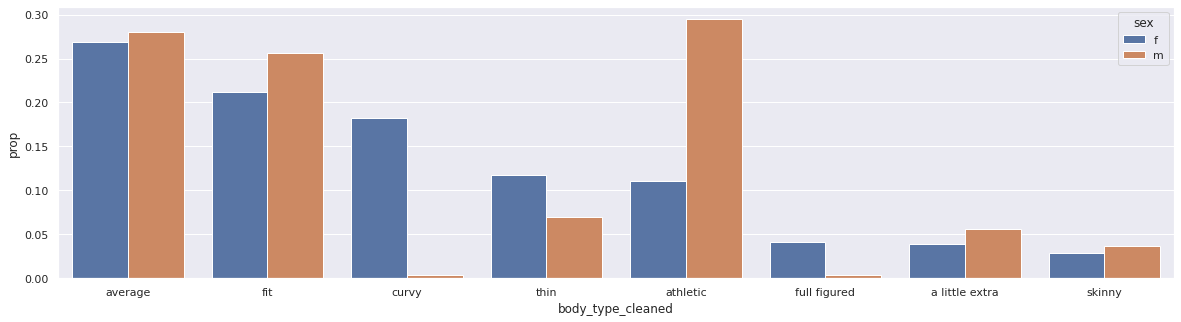

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
(df[df['body_type_cleaned'] != 'NA']['body_type_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='body_type_cleaned', y='prop', hue='sex'))

In [ ]:
# sns.set(rc={'figure.figsize':(30,5)})
# sns.swarmplot(x='body_type_cleaned', y='age', data=df[df['body_type_cleaned'] != 'NA'][:5000], s=2)

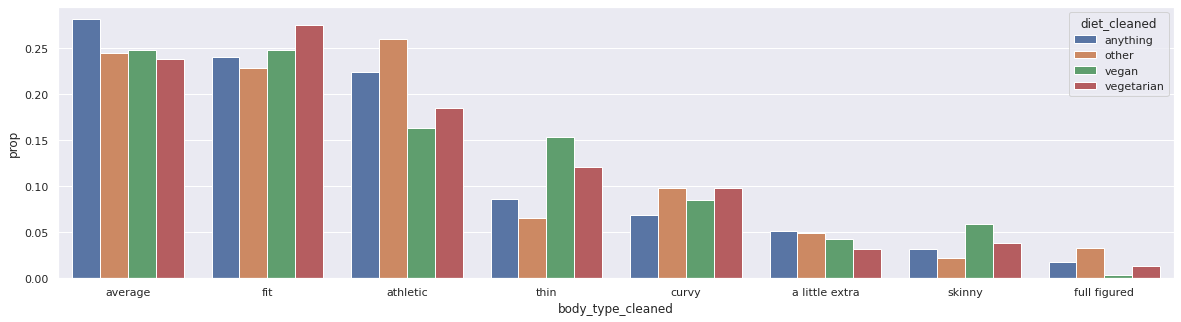

In [ ]:
(df[df['body_type_cleaned'] != 'NA']['body_type_cleaned']
 .groupby(df[df['diet_cleaned'] != 'NA']['diet_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='body_type_cleaned', y='prop', hue='diet_cleaned'))

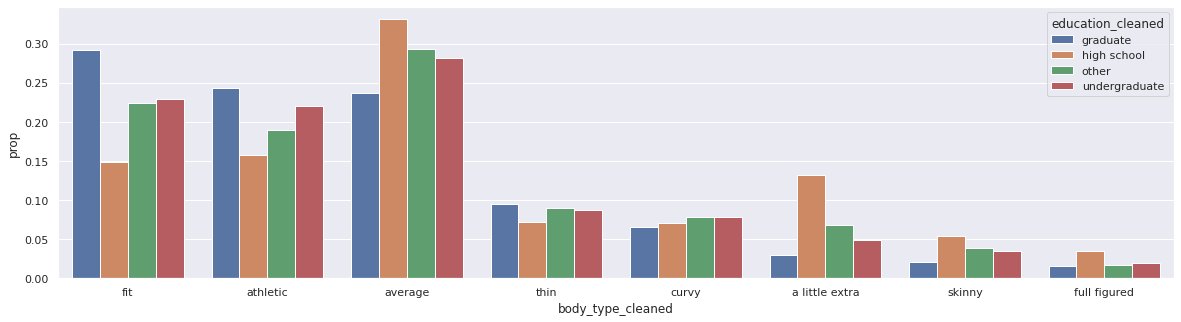

In [ ]:
(df[df['body_type_cleaned'] != 'NA']['body_type_cleaned']
 .groupby(df[df['education_cleaned'] != 'NA']['education_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='body_type_cleaned', y='prop', hue='education_cleaned'))

### Drinks & Drugs

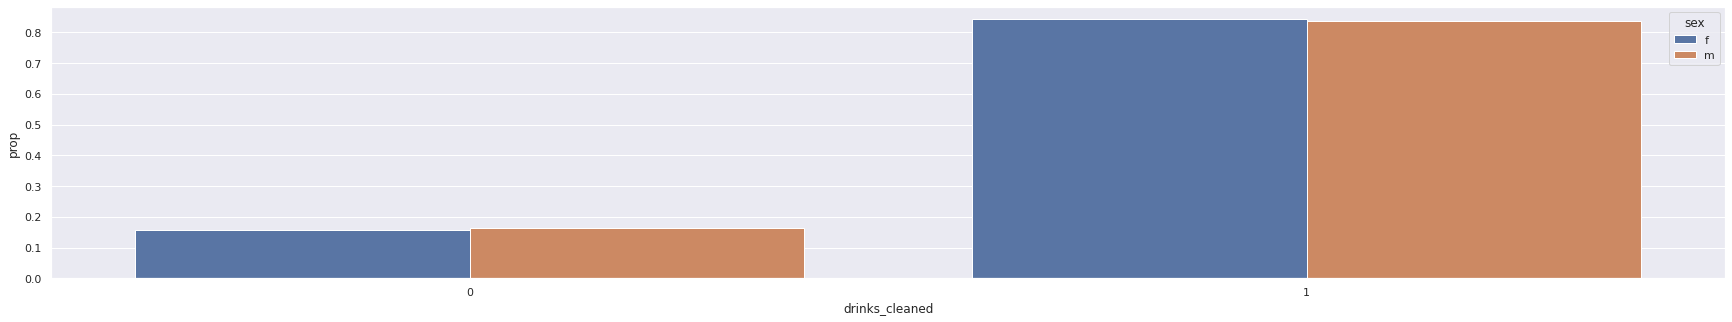

In [ ]:
(df[df['drinks_cleaned'] != 'NA']['drinks_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='drinks_cleaned', y='prop', hue='sex'))

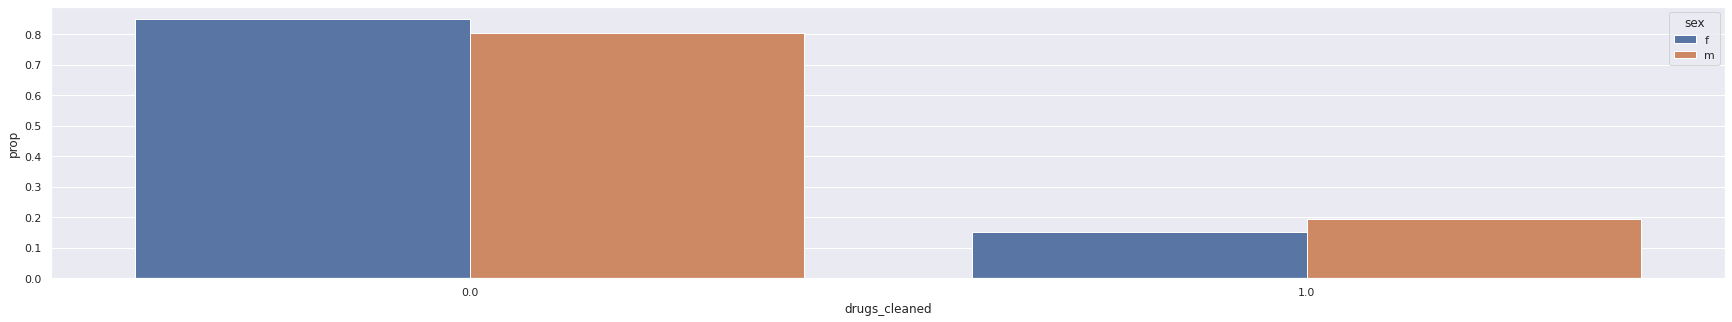

In [ ]:
(df[df['drugs_cleaned'] != 'NA']['drugs_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='drugs_cleaned', y='prop', hue='sex'))

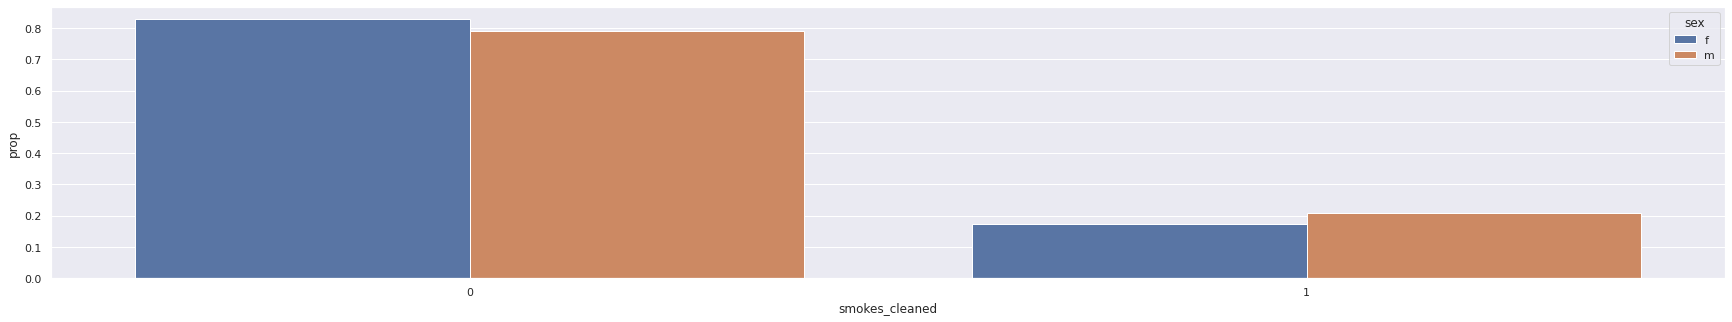

In [ ]:
(df[df['smokes_cleaned'] != 'NA']['smokes_cleaned']
 .groupby(df['sex'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='smokes_cleaned', y='prop', hue='sex'))

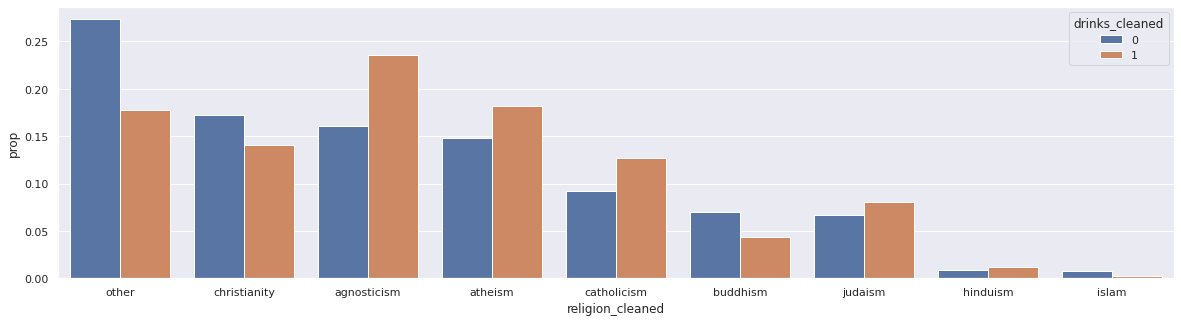

In [ ]:
(df[df['religion_cleaned'] != 'NA']['religion_cleaned']
 .groupby(df[df['drinks_cleaned'] != 'NA']['drinks_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='religion_cleaned', y='prop', hue='drinks_cleaned'))

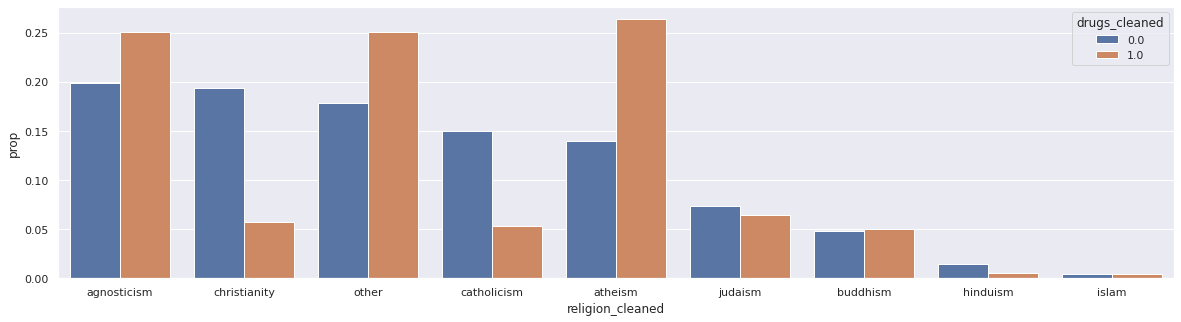

In [ ]:
(df[df['religion_cleaned'] != 'NA']['religion_cleaned']
 .groupby(df[df['drugs_cleaned'] != 'NA']['drugs_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='religion_cleaned', y='prop', hue='drugs_cleaned'))

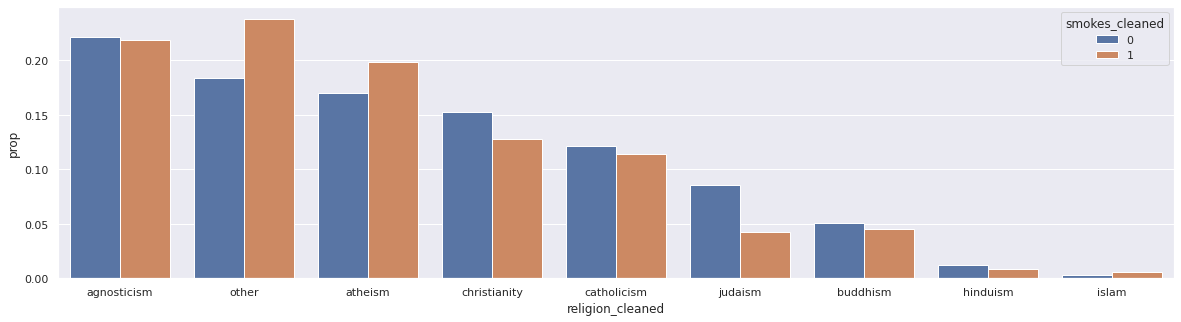

In [ ]:
(df[df['religion_cleaned'] != 'NA']['religion_cleaned']
 .groupby(df[df['smokes_cleaned'] != 'NA']['smokes_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='religion_cleaned', y='prop', hue='smokes_cleaned'))

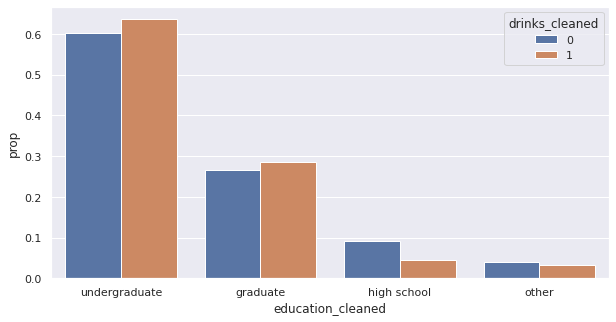

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
(df[df['education_cleaned'] != 'NA']['education_cleaned']
 .groupby(df[df['drinks_cleaned'] != 'NA']['drinks_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='education_cleaned', y='prop', hue='drinks_cleaned'))

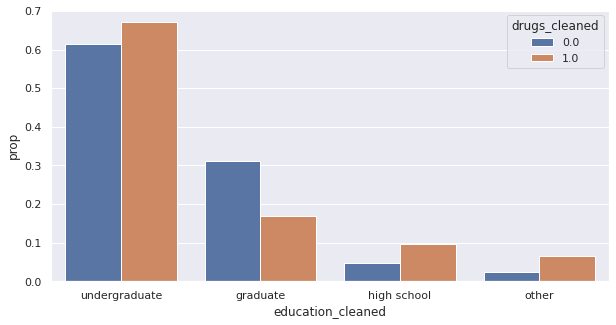

In [ ]:
(df[df['education_cleaned'] != 'NA']['education_cleaned']
 .groupby(df[df['drugs_cleaned'] != 'NA']['drugs_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='education_cleaned', y='prop', hue='drugs_cleaned'))

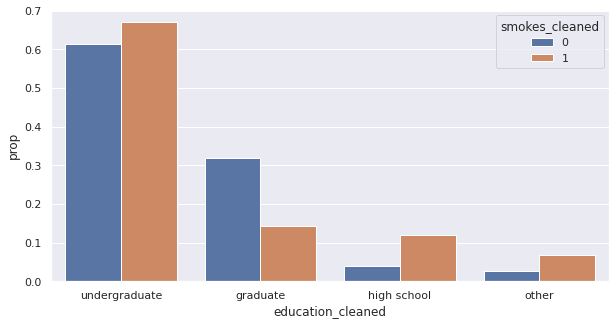

In [ ]:
(df[df['education_cleaned'] != 'NA']['education_cleaned']
 .groupby(df[df['smokes_cleaned'] != 'NA']['smokes_cleaned'])
 .value_counts(normalize=True)
 .rename('prop')
 .reset_index()
 .pipe((sns.barplot, "data"), x='education_cleaned', y='prop', hue='smokes_cleaned'))